In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
covid=pd.read_csv('C:/Users/hitix/OneDrive/Documents/dataset/covid.csv')

In [5]:
covid.head()

,state,confirmed,active,passive,deaths,dose1,dose2,dose3,precaution_dose,total_doses,population
0,Andaman and Nicobar,10742,1,10612,129,313284,320383,236936,53427,991263,426251
1,Andhra Pradesh,2339067,3,2324331,14733,40643161,43549055,11703273,6579565,110556756,52883163
2,Arunachal Pradesh,66890,0,66594,296,860442,747177,72403,58618,1911760,1528296
3,Assam,746100,0,738065,8035,22549957,20561790,2082670,1259853,50284713,34586234
4,Bihar,851379,15,839062,12302,62944633,59144387,11983504,3868082,157197041,119461013


In [6]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   state            36 non-null     object
 1   confirmed        36 non-null     int64 
 2   active           36 non-null     int64 
 3   passive          36 non-null     int64 
 4   deaths           36 non-null     int64 
 5   dose1            36 non-null     int64 
 6   dose2            36 non-null     int64 
 7   dose3            36 non-null     int64 
 8   precaution_dose  36 non-null     int64 
 9   total_doses      36 non-null     int64 
 10  population       36 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 3.2+ KB


In [8]:
covid.shape

(36, 11)

In [9]:
covid.describe()

,confirmed,active,passive,deaths,dose1,dose2,dose3,precaution_dose,total_doses,population
count,3.600000e+01,36.000000,3.600000e+01,36.000000,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01
mean,1.241053e+06,98.666667,1.226213e+06,14741.611111,2.555372e+07,2.398740e+07,4.286358e+06,1.892749e+06,6.098716e+07,3.712387e+07
std,1.833873e+06,305.722844,1.808032e+06,27168.565338,3.234424e+07,3.063309e+07,6.862957e+06,2.312095e+06,7.921462e+07,4.835507e+07
min,1.074200e+04,0.000000,1.061200e+04,4.000000,5.690800e+04,5.599200e+04,1.575700e+04,6.949000e+03,1.450080e+05,7.221000e+04
25%,1.058625e+05,1.000000,1.048608e+05,1120.750000,1.045166e+06,8.887390e+05,1.312262e+05,6.647575e+04,2.279865e+06,1.539136e+06
50%,6.127550e+05,10.500000,6.063365e+05,6541.000000,1.777784e+07,1.519745e+07,1.280998e+06,8.453680e+05,4.052818e+07,2.309525e+07
75%,1.320729e+06,46.750000,1.311100e+06,14292.750000,4.281102e+07,4.428936e+07,5.811635e+06,3.066116e+06,1.117488e+08,5.563917e+07
max,8.136588e+06,1389.000000,7.988008e+06,148416.000000,1.540583e+08,1.477160e+08,3.562354e+07,9.240735e+06,3.906395e+08,2.289596e+08


In [11]:
covid.columns

Index(['state', 'confirmed', 'active', 'passive', 'deaths', 'dose1', 'dose2',
       'dose3', 'precaution_dose', 'total_doses', 'population'],
      dtype='object')

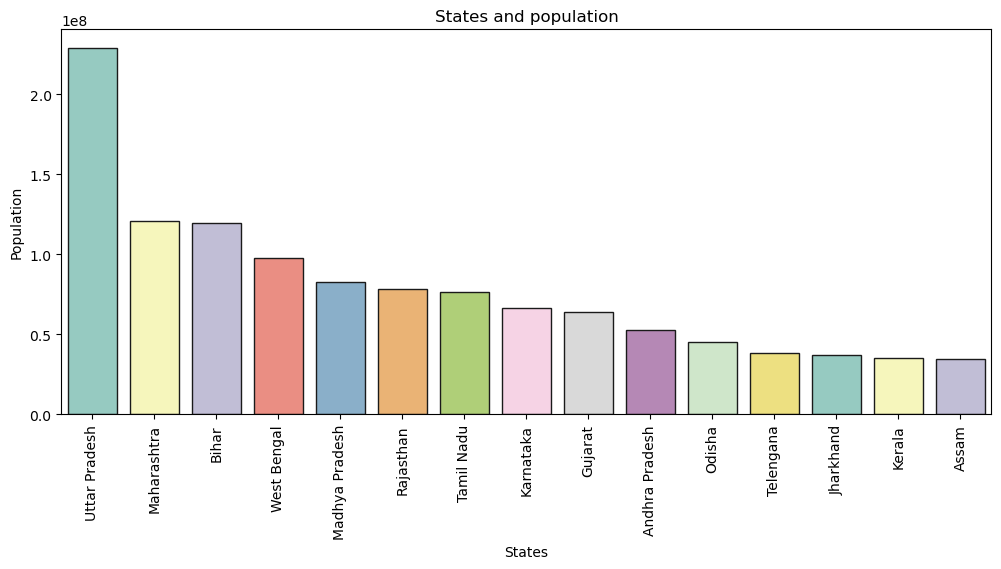

In [52]:
states = list(covid.sort_values(by='population',ascending=False).state)[:15]
values = covid.sort_values(by='population',ascending=False)['population'].values[:15]
plt.figure(figsize=(12,5))
sns.barplot(x=states,y=values,palette='Set3',edgecolor='.1')
plt.xticks(rotation='90')
plt.xlabel('States')
plt.ylabel('Population')
plt.title('States and population')
plt.show()


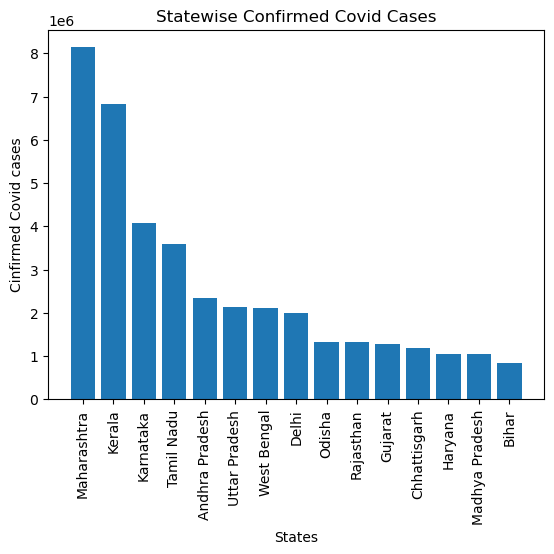

In [53]:
y=covid.sort_values(by='confirmed',ascending=False)['confirmed'][:15]
x=covid.sort_values(by='confirmed',ascending=False)['state'][:15]
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Cinfirmed Covid cases')
plt.bar(x,y)
plt.title('Statewise Confirmed Covid Cases')
plt.show()

<AxesSubplot:ylabel='deaths'>

<Figure size 800x800 with 0 Axes>

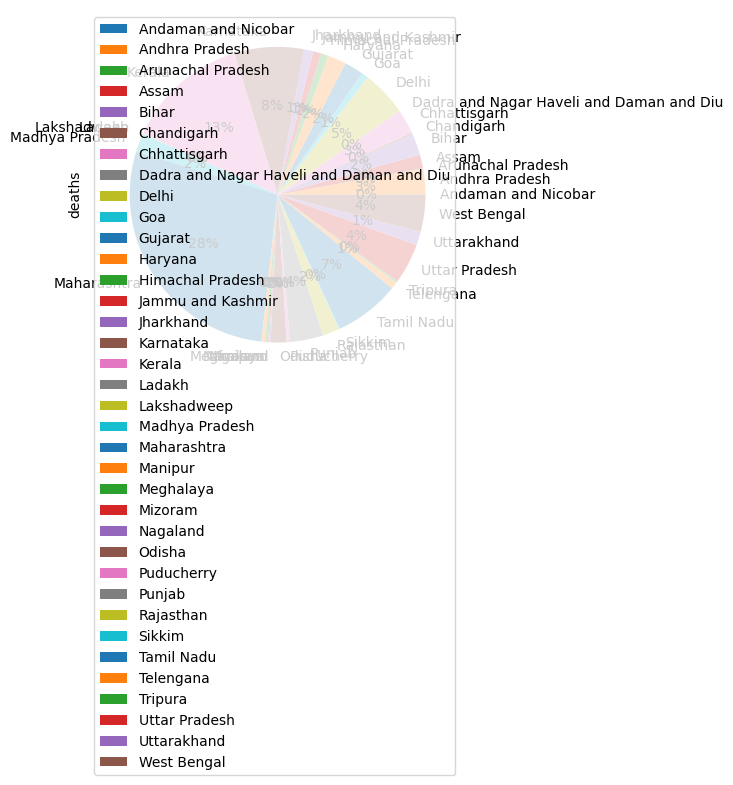

In [123]:
plt.figure(figsize=(8,8))
covid.groupby(['state']).sum().plot(kind='pie',y='deaths',autopct='%1.0f%%')

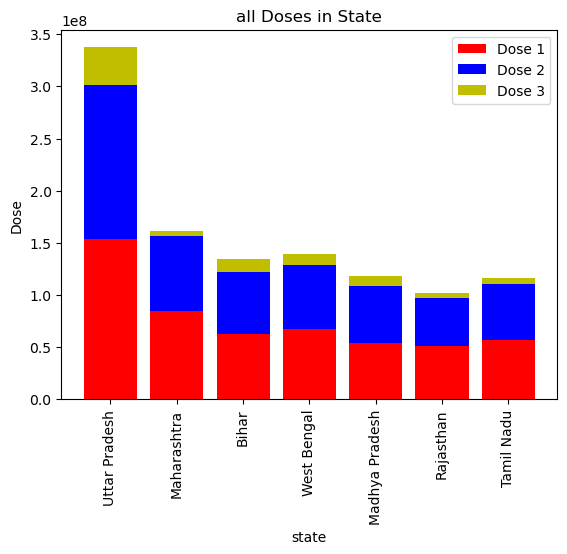

In [38]:
x=covid.sort_values(by='population',ascending=False)['state'][:7]
y1=covid.sort_values(by='population',ascending=False)['dose1'][:7]
y2=covid.sort_values(by='population',ascending=False)['dose2'][:7]
y3=covid.sort_values(by='population',ascending=False)['dose3'][:7]
y4=covid.sort_values(by='population',ascending=False)['precaution_dose']
y5=covid.sort_values(by='population',ascending=False)['total_doses']
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')

plt.xlabel("state")
plt.ylabel("Dose")
plt.legend(["Dose 1", "Dose 2", "Dose 3"])
plt.xticks(rotation='90')
plt.title("all Doses in State")
plt.show()

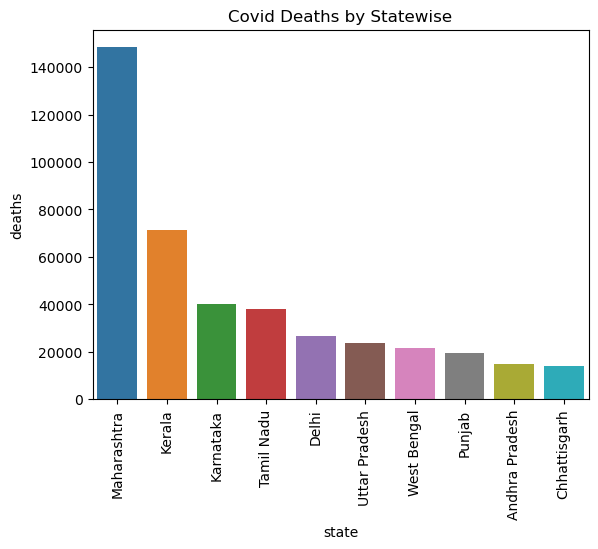

In [51]:
#y=covid['deaths']
#x=covid['state']
deaths=covid.sort_values(by='deaths',ascending=False)['deaths'][:10]
state=covid.sort_values(by='deaths',ascending=False)['state'][:10]
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('NUmber Of Deaths')
sns.barplot(x=state,y=deaths)
plt.title('Covid Deaths by Statewise')
plt.show()

In [106]:
covid['positivity rate'] = covid['confirmed']*100/covid['population']


states_positivity_high = covid.sort_values(by='positivity rate',ascending=False)['state'].values[:20]
values_high=covid.sort_values(by='positivity rate',ascending =True)['positivity rate'].values[:20]

print('States with high postivity are')
for i in states_positivity_high:
    print(i,' ------> postivity rate of ',covid[covid['state']==str(i)]['positivity rate'].values[0],'%')

States with high postivity are
Mizoram  ------> postivity rate of  19.81502088768083 %
Kerala  ------> postivity rate of  19.32655924187357 %
Goa  ------> postivity rate of  16.79332361043591 %
Lakshadweep  ------> postivity rate of  15.808059825508932 %
Puducherry  ------> postivity rate of  12.55685204409794 %
Delhi  ------> postivity rate of  10.675115758579686 %
Ladakh  ------> postivity rate of  9.57409408731657 %
Chandigarh  ------> postivity rate of  8.404336674268931 %
Maharashtra  ------> postivity rate of  6.733504336204931 %
Sikkim  ------> postivity rate of  6.597838385041387 %
Karnataka  ------> postivity rate of  6.154067067128822 %
Tamil Nadu  ------> postivity rate of  4.699680164672405 %
Manipur  ------> postivity rate of  4.650818036353773 %
Andhra Pradesh  ------> postivity rate of  4.423084526922113 %
Arunachal Pradesh  ------> postivity rate of  4.376769945089171 %
Himachal Pradesh  ------> postivity rate of  4.273014585247901 %
Chhattisgarh  ------> postivity rate

In [107]:
states_positivity_low = covid.sort_values(by='positivity rate',ascending=True)['state'].values[:20]
values_low=covid.sort_values(by='positivity rate',ascending =True)['positivity rate'].values[:20]

print('States with high postivity are')
for i in states_positivity_low:
    print(i,' ------> postivity rate of ',covid[covid['state']==str(i)]['positivity rate'].values[0],'%')

States with high postivity are
Bihar  ------> postivity rate of  0.7126835597819684 %
Uttar Pradesh  ------> postivity rate of  0.929466599913114 %
Jharkhand  ------> postivity rate of  1.185588905264543 %
Madhya Pradesh  ------> postivity rate of  1.2811297280139624 %
Nagaland  ------> postivity rate of  1.6437239899383227 %
Rajasthan  ------> postivity rate of  1.6815048944395519 %
Dadra and Nagar Haveli and Daman and Diu  ------> postivity rate of  1.7631820332191952 %
Gujarat  ------> postivity rate of  1.9990814806469381 %
Assam  ------> postivity rate of  2.1572166544643165 %
West Bengal  ------> postivity rate of  2.168592934579225 %
Telengana  ------> postivity rate of  2.1868038663918368 %
Andaman and Nicobar  ------> postivity rate of  2.5201113897680005 %
Punjab  ------> postivity rate of  2.6482734073271468 %
Tripura  ------> postivity rate of  2.662347791821624 %
Odisha  ------> postivity rate of  2.9420420023606297 %
Meghalaya  ------> postivity rate of  2.954012775907626

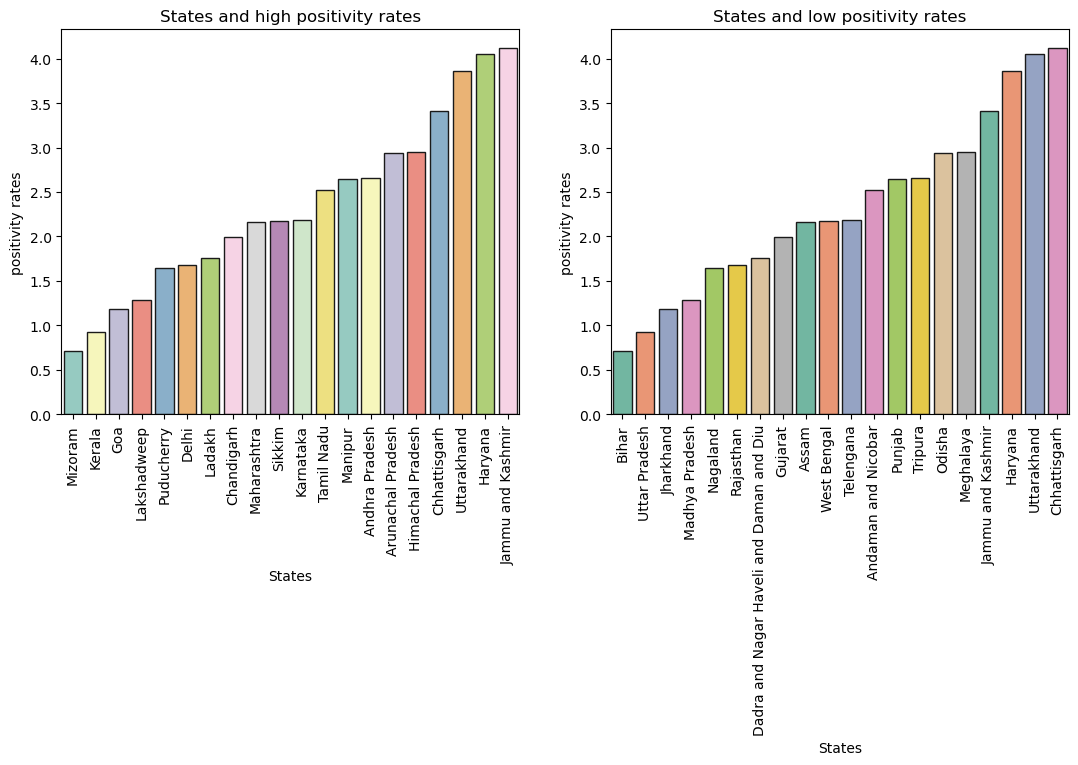

In [108]:
plt.figure(figsize=(13,5))
plt.subplot(121)
sns.barplot(x=states_positivity_high,y=values_high,palette='Set3',edgecolor='.1')
plt.xticks(rotation='90')
plt.xlabel('States')
plt.ylabel('positivity rates')
plt.title('States and high positivity rates')
plt.subplot(122)
sns.barplot(x=states_positivity_low,y=values_low,palette='Set2',edgecolor='.1')
plt.xticks(rotation='90')
plt.xlabel('States')
plt.ylabel('positivity rates')
plt.title('States and low positivity rates')
plt.show()

<AxesSubplot:xlabel='Positivity rate', ylabel='Count'>

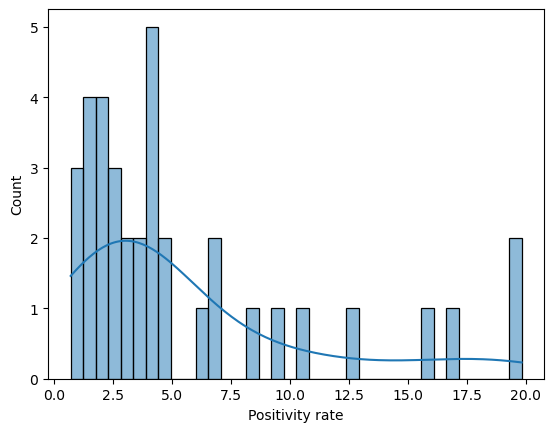

In [109]:
sns.histplot(covid['Positivity rate'],bins=36,kde=True)

In [110]:
covid['death rate']=covid['deaths']*100/covid['confirmed']
states_death_low = covid.sort_values(by='death rate',ascending=True)['state'].values[:25]
values_low=covid.sort_values(by='death rate',ascending =True)['death rate'].values[:25]



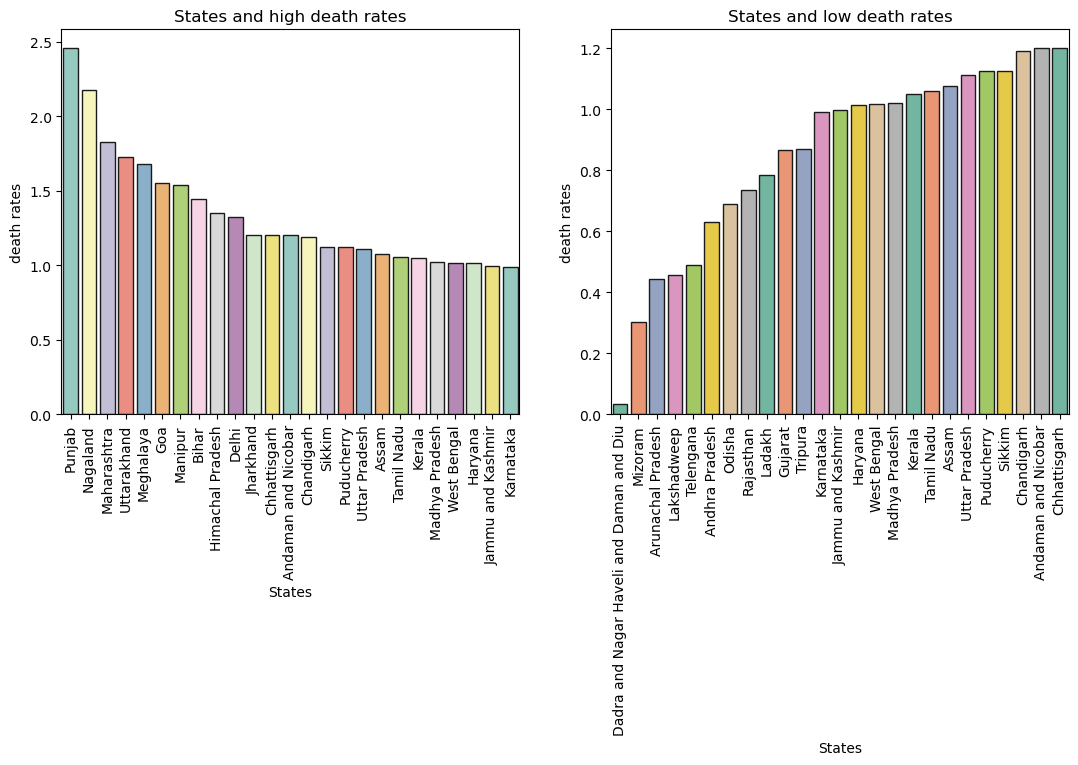

In [111]:
covid['death rate']=covid['deaths']*100/covid['confirmed']
states_death_high = covid.sort_values(by='death rate',ascending=False)['state'].values[:25]
values_high = covid.sort_values(by='death rate',ascending=False)['death rate'].values[:25]

#states_death_low = df.sort_values(by='death rate',ascending=True)['state'].values[:5]
#values_low = df.sort_values(by='death rate',ascending=True)['death rate'].values[:5]

plt.figure(figsize=(13,5))
plt.subplot(121)
sns.barplot(x=states_death_high,y=values_high,palette='Set3',edgecolor='.1')
plt.xticks(rotation='90')
plt.xlabel('States')
plt.ylabel('death rates')
plt.title('States and high death rates')
plt.subplot(122)
sns.barplot(x=states_death_low,y=values_low,palette='Set2',edgecolor='.1')
plt.xticks(rotation='90')
plt.xlabel('States')
plt.ylabel('death rates')
plt.title('States and low death rates')
plt.show()

In [112]:
covid.head()

,state,confirmed,active,passive,deaths,dose1,dose2,dose3,precaution_dose,total_doses,population,Positivity rate,death rate,positivity rate
0,Andaman and Nicobar,10742,1,10612,129,313284,320383,236936,53427,991263,426251,2.520111,1.200894,2.520111
1,Andhra Pradesh,2339067,3,2324331,14733,40643161,43549055,11703273,6579565,110556756,52883163,4.423085,0.629867,4.423085
2,Arunachal Pradesh,66890,0,66594,296,860442,747177,72403,58618,1911760,1528296,4.376770,0.442518,4.376770
3,Assam,746100,0,738065,8035,22549957,20561790,2082670,1259853,50284713,34586234,2.157217,1.076933,2.157217
4,Bihar,851379,15,839062,12302,62944633,59144387,11983504,3868082,157197041,119461013,0.712684,1.444950,0.712684


<AxesSubplot:xlabel='deaths', ylabel='Density'>

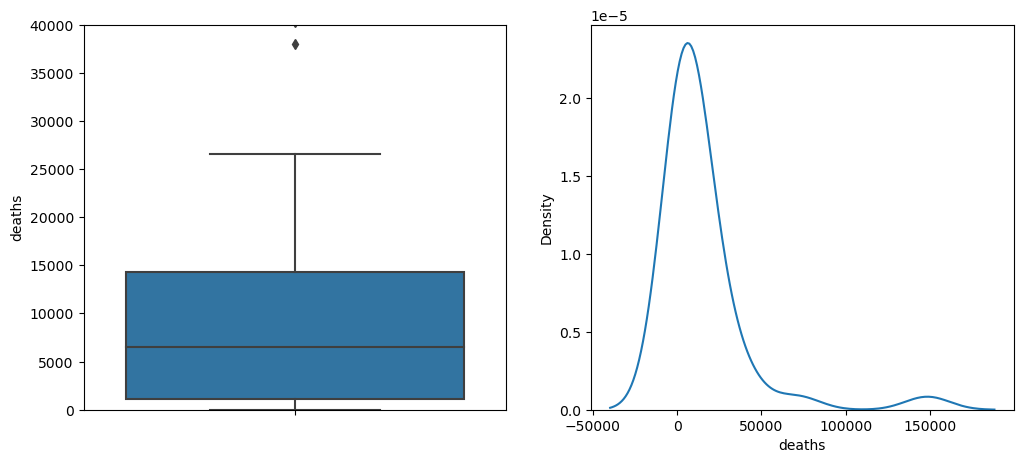

In [114]:
#Distribution of deaths in the country
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.boxplot(y = covid['deaths'])
plt.ylim(0,40000)
plt.subplot(122)
sns.kdeplot(covid['deaths'])

44677915 530698 1.1878307212858972


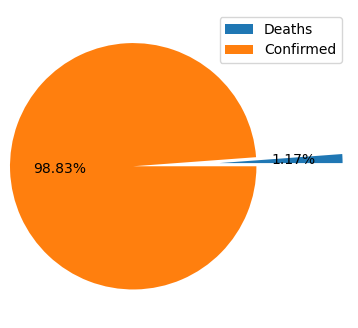

In [144]:
plt.figure(figsize=(4,4))

deaths =covid.sum()['deaths']
confirmed = covid.sum()['confirmed']
print(confirmed,deaths,100*deaths/confirmed)
plt.pie(x=[deaths,confirmed],shadow=False,explode=(0.2,0.5),autopct='%1.2f%%')
plt.legend(['Deaths','Confirmed'])

population= 1336459178
Number of people got dose1= 919934067
Number of people got dose2= 863546529
Number of people got dose3= 154308906
68.83368247556005


Text(0.5, 1.0, 'Dose3 distrubution')

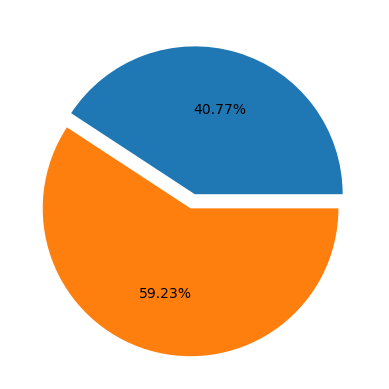

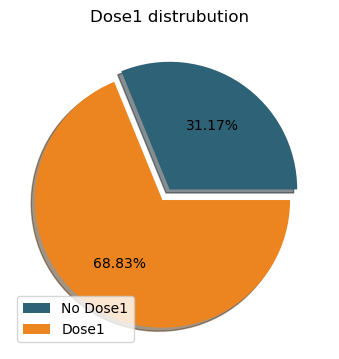

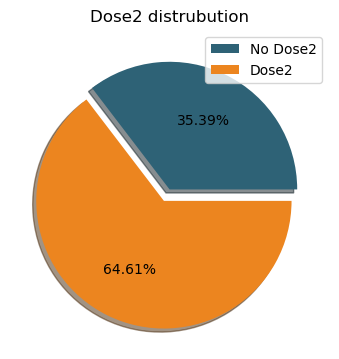

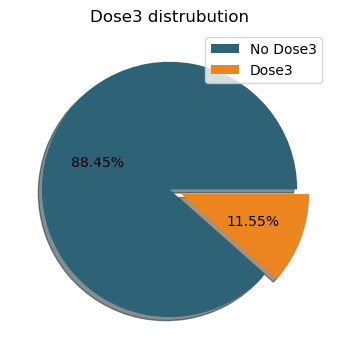

In [145]:
population=covid.sum()['population']
print('population=',population)
dose1=covid.sum()['dose1']
print('Number of people got dose1=',dose1)
dose2=covid.sum()['dose2']
print('Number of people got dose2=',dose2)
dose3=covid.sum()['dose3']
print('Number of people got dose3=',dose3)
plt.pie(x=[dose1,population],shadow=False,explode=(0,0.1),autopct='%1.2f%%')
plt.figure(figsize=(14,14))
plt.subplot(131)
plt.pie(x=[population-dose1,dose1],autopct='%1.2f%%',shadow=True,explode=(0,0.1),colors=('#2E6276','#EC851F'))
plt.legend(['No Dose1','Dose1'])
plt.title('Dose1 distrubution')
#plt.pie(x=[dose2,population],shadow=False,explode=(0.2,0.5),autopct='%1.2f%%')
#plt.pie(x=[dose3,population],shadow=False,explode=(0.2,0.5),autopct='%1.2f%%')
print(100*dose1/population)

plt.figure(figsize=(14,14))
plt.subplot(131)
plt.pie(x=[population-dose2,dose2],autopct='%1.2f%%',shadow=True,explode=(0,0.1),colors=('#2E6276','#EC851F'))
plt.legend(['No Dose2','Dose2'])
plt.title('Dose2 distrubution')


plt.figure(figsize=(14,14))
plt.subplot(131)
plt.pie(x=[population-dose3,dose3],autopct='%1.2f%%',shadow=True,explode=(0,0.1),colors=('#2E6276','#EC851F'))
plt.legend(['No Dose3','Dose3'])
plt.title('Dose3 distrubution')

In [129]:
population=covid.sum()['population']

In [130]:
population

1336459178